# Test: Sequence to Image Converter

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import time

In [6]:
giessen_orig = pd.read_csv("./Giessen_Dataset/cip_ctx_ctz_gen_multi_data.csv")

In [20]:
giessen_orig.head()

,prename,X393,X588,X747,X759,X774,X966,X1299,X1302,X1407,...,X4639956.3,X4640785.3,X4640908.3,X4640924.3,X4641031.3,X4641131.3,X4641217.3,X4641296.3,X4641439.3,X4641440.3
0,H100_S2_L001,2,1,2,4,3,3,3,3,4,...,3,4,4,2,1,3,1,3,3,1
1,H105_S3_L001,2,1,2,4,3,3,3,3,4,...,3,4,4,2,1,3,1,3,3,1
2,H108_S5_L001,2,1,2,4,3,3,0,0,4,...,3,4,4,2,1,3,1,3,3,1
3,H109_S2_L001,2,1,2,4,3,3,3,3,4,...,3,4,4,2,1,3,1,3,3,1
4,H113_S6_L001,0,0,2,4,3,3,3,3,4,...,3,4,0,0,2,3,1,3,3,1


In [8]:
giessen_orig.shape

(809, 60937)

In [21]:
df = giessen_orig.copy()

In [23]:
gene_df = df.drop(columns=["prename"])
gene_df

,X393,X588,X747,X759,X774,X966,X1299,X1302,X1407,X1425,...,X4639956.3,X4640785.3,X4640908.3,X4640924.3,X4641031.3,X4641131.3,X4641217.3,X4641296.3,X4641439.3,X4641440.3
0,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
1,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
2,2,1,2,4,3,3,0,0,4,2,...,3,4,4,2,1,3,1,3,3,1
3,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
4,0,0,2,4,3,3,3,3,4,2,...,3,4,0,0,2,3,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0,0,2,4,3,3,0,0,4,0,...,3,4,0,0,2,3,1,3,3,1
805,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
806,2,0,0,0,3,0,3,3,4,0,...,3,4,0,0,0,3,0,0,0,0
807,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1


**Task: Find the dimension of image before converting the genotype sequence in the form of an image**
https://www.frontiersin.org/files/Articles/914435/fbinf-02-914435-HTML/image_m/fbinf-02-914435-g005.jpg

1. Let N be the length of the genotype sequence.
2. Take the sqrt of N and suppose it is M. Extract 0 to the square of M sequence from the genotype data.

In [27]:
no_isolates = gene_df.shape[0]
N = gene_df.shape[1]
print("Length of genotype sequence:",N)

Length of genotype sequence 60936


In [119]:
def encode_seq_to_image(seq):
    N = len(seq)
    M = int(np.sqrt(N))
    # print("Original length of genotype sequence:", N)
    # print("New image size", M)
    image_data = np.array(seq[:M*M]).reshape(M,M)
    return image_data

In [142]:
## Heatmap
def heatmap2d(name, arr):
    fig = plt.figure()
    plt.imshow(arr, cmap=cmap)
    plt.axis('off')
    plt.savefig(f'./output_images/{name}.png')
    plt.close(fig) #Avoids displaying figure in notebook

## Color mapping
* 0 = Null = white,
* 1 = A = red
* 2 = C = green
* 3 = G = yellow
* 4 = T = blue

In [148]:
def process_encoding(file_path):

    ###
    # Processes a csv file containing genotype sequences, 
    # encodes the genotype sequences into 2d matrices,  
    # creates visualizations for each 2d matrices as .pngs,
    # and returns a dict where keys are name of isolates and values are 2d matrix representation of the genotype sequences. 

    # Input: file_path: str, path to the csv file
    # Output: image_data_dict, dict containing isolate name (key) and its 2d-encoded gene sequences (values)

    print("Start encoding process of genotype sequences to images.")
    
    start_time = time.time()
    print("1. Reading and processing CSV.")

    df = pd.read_csv(file_path)
    gene_df = df.drop(columns=["prename"])

    isolate_list = df["prename"]
    gene_lists = gene_df.values.tolist()
    genotype_seq_dict = dict(zip(isolate_list, gene_lists))

    no_of_isolates = len(isolate_list)
    len_of_genes = gene_df.shape[1]
    M = int(np.sqrt(len_of_genes))
    print("Number of isolates:", no_of_isolates)
    print("Length of genotype sequence:", len_of_genes)
    print(f"Image dimensions: {M} x {M}")

    print("2. Encoding...")
    # Encode

    image_data_dict = dict()
    for k,v in genotype_seq_dict.items(): # k = name, v = gene sequence
        image_data = encode_seq_to_image(v)
        image = heatmap2d(k, image_data)
        image_data_dict[k] = image_data

    end_time = time.time()
    duration = np.round(end_time-start_time, 2)
    print("Finished encoding process. Duration:", duration, " seconds.")

    return image_data_dict
    

In [149]:
process_encoding("./Giessen_Dataset/cip_ctx_ctz_gen_multi_data.csv")

Start encoding process of genotype sequences to images.
1. Reading and processing CSV.
Number of isolates: 809
Length of genotype sequence: 60936
Image dimensions: 246 x 246
2. Encoding...
Finished encoding process. Duration: 161.77  seconds.


{'H100_S2_L001': array([[2, 1, 2, ..., 1, 3, 2],
        [0, 4, 2, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [4, 3, 2, ..., 2, 2, 3],
        [2, 1, 3, ..., 0, 3, 2],
        [3, 1, 3, ..., 3, 3, 2]]),
 'H105_S3_L001': array([[2, 1, 2, ..., 1, 3, 2],
        [4, 4, 2, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [4, 3, 2, ..., 2, 2, 3],
        [2, 1, 3, ..., 3, 3, 2],
        [3, 1, 3, ..., 3, 3, 2]]),
 'H108_S5_L001': array([[2, 1, 2, ..., 1, 3, 2],
        [4, 4, 2, ..., 3, 3, 3],
        [3, 0, 3, ..., 3, 3, 3],
        ...,
        [4, 3, 2, ..., 2, 2, 3],
        [2, 1, 3, ..., 0, 3, 2],
        [3, 1, 3, ..., 3, 3, 2]]),
 'H109_S2_L001': array([[2, 1, 2, ..., 0, 3, 2],
        [4, 0, 0, ..., 3, 0, 0],
        [0, 0, 3, ..., 3, 3, 3],
        ...,
        [4, 3, 2, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 3, 2],
        [3, 1, 3, ..., 3, 3, 2]]),
 'H113_S6_L001': array([[0, 0, 2, ..., 0, 3, 2],
        [4, 0, 2, ..., 3, 3, 3],
  

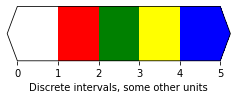

In [75]:
fig, ax = plt.subplots(figsize=(4, 1))

cmap = ListedColormap(['white', 'red', 'green', 'yellow', 'blue'])
bounds = [0,1,2,3,4,5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    extend='both',
    ticks=bounds,
    spacing='proportional',
    orientation='horizontal',
    label='Discrete intervals, some other units',
)